In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

from ml_tooling import Model
from ml_tooling.data import Dataset
from ml_tooling.plots import plot_learning_curve

In [6]:
class BostonData(Dataset):
    def load_prediction_data(self, idx):
        data = load_boston()
        return pd.DataFrame(data=data.data, columns=data.feature_names).loc[idx]

    def load_training_data(self):
        data = load_boston()
        return pd.DataFrame(data=data.data, columns=data.feature_names), data.target

# Instantiate a model with an estimator
linear_boston = Model(LinearRegression())

# Instantiate the data
data = BostonData()
# Split training and test data
data.create_train_test()

<BostonData - Dataset>

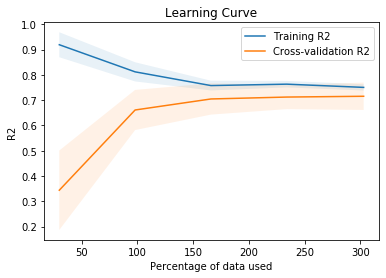

In [13]:
plot_learning_curve(linear_boston.estimator, data.train_x, data.train_y)

In [14]:
# Score the estimator yielding a Result object
result = linear_boston.score_estimator(data)
print(result)

[21:58:28] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>


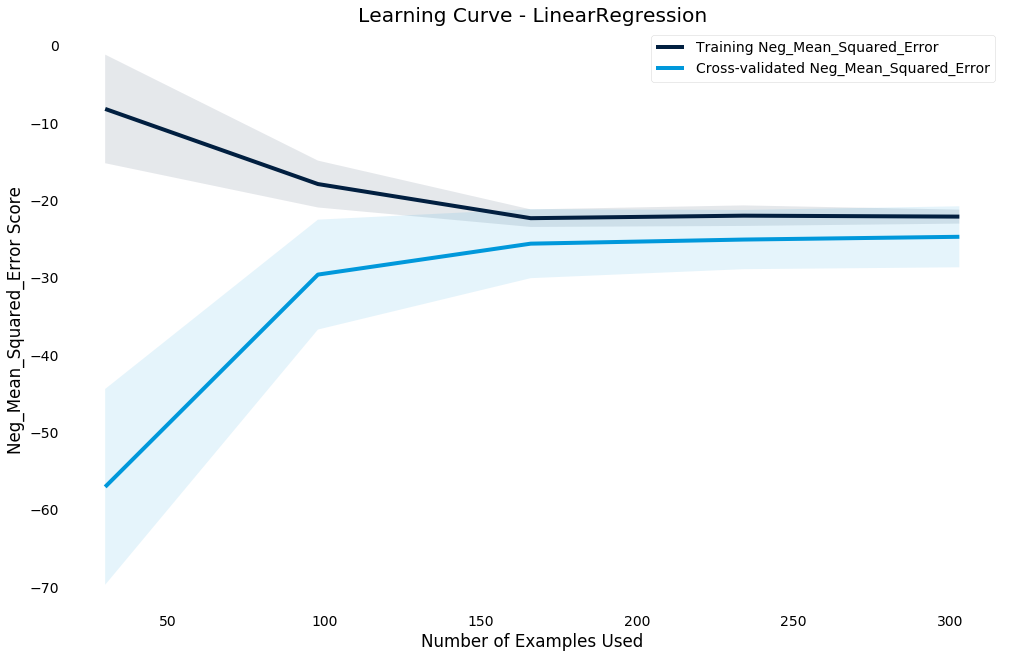

In [35]:
ax = result.plot.learning_curve(scoring='neg_mean_squared_error')

In [32]:
result.data.train_x.shape[0] * 4 // 5

303

In [31]:
ax.lines[0].get_xdata().max()

303

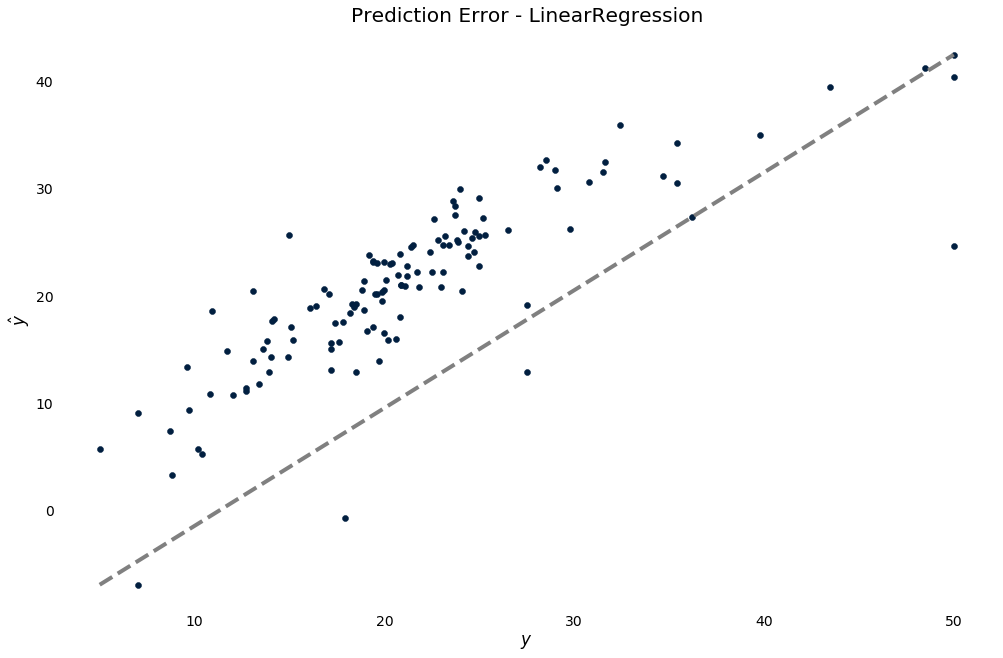

In [7]:
# Visualize the result
result.plot.prediction_error()

# Scaling

In [8]:
from sklearn.pipeline import Pipeline

from ml_tooling.transformers import DFStandardScaler

scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [9]:
scaled_linear = Model(scaled)
result = scaled_linear.score_estimator(data)
result

[11:59:35] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>

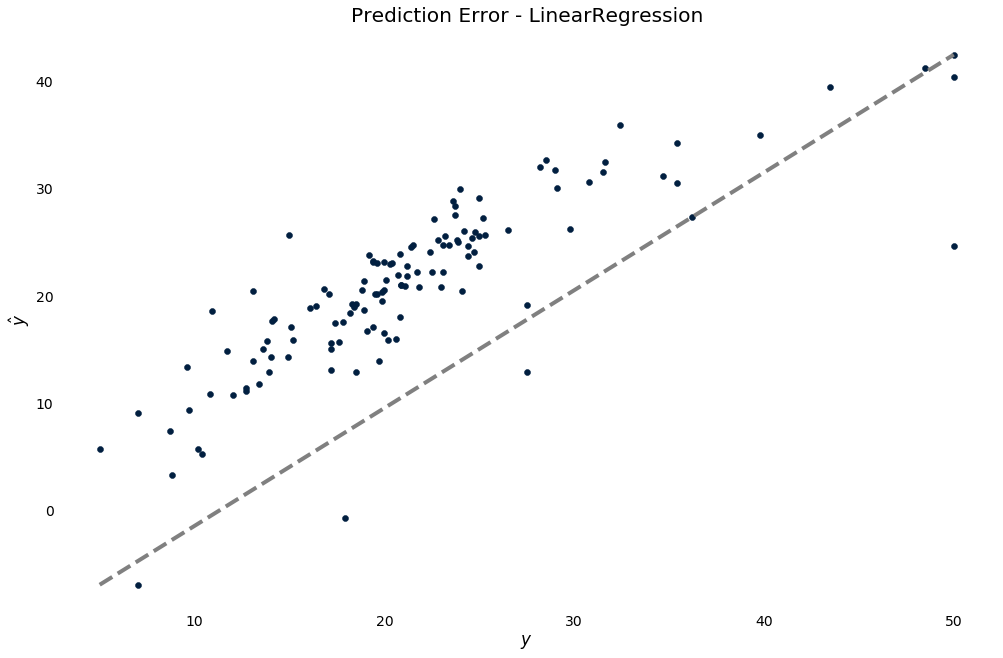

In [12]:
result.plot.prediction_error()

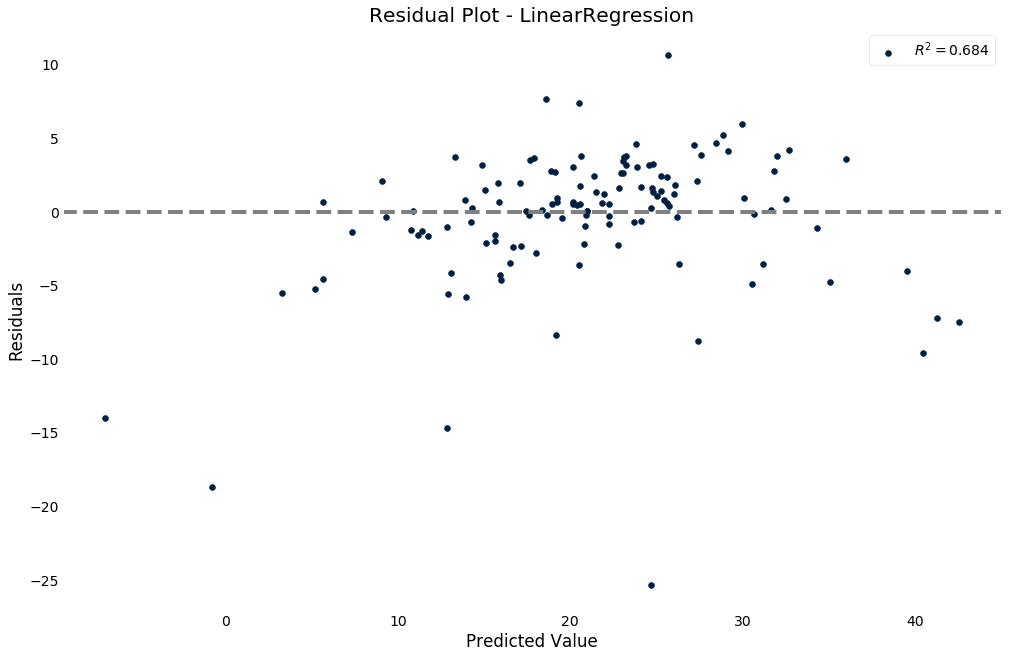

In [13]:
result.plot.residuals()

In [14]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from ml_tooling.transformers import Select

In [15]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX', 'NOX',  'CRIM'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [16]:
estimators = [create_pipeline(est)
              for est
              in [LinearRegression(),
                  RidgeCV(cv=100),
                  ElasticNetCV(cv=100)]
             ]
best_model, results = Model.test_estimators(data, estimators)

[12:00:48] - Training estimator 1/3: LinearRegression
[12:00:48] - Scoring estimator...
[12:00:48] - Training estimator 2/3: RidgeCV
[12:00:48] - Scoring estimator...
/home/valentin/git/ml_tooling/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[12:00:48] - Training estimator 3/3: ElasticNetCV
[12:00:48] - Scoring estimator...
[12:00:49] - Best estimator: ElasticNetCV - r2: 0.6285630323902646


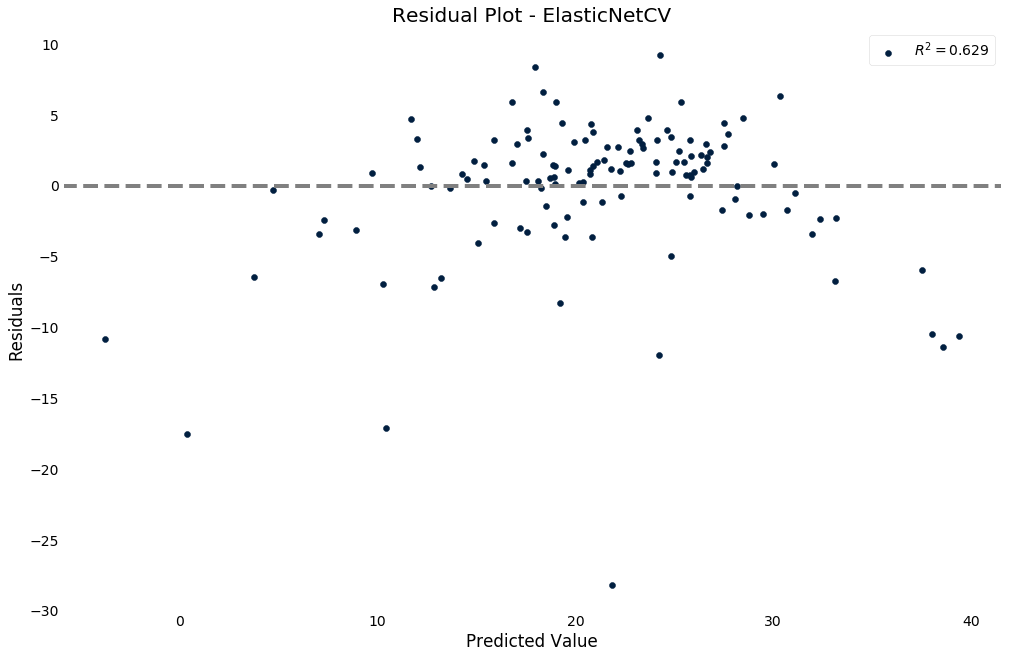

In [17]:
results.plot.residuals()

In [18]:
best_model.estimator.named_steps['estimator'].coef_

array([-3.7566104 ,  3.50097015, -1.77435125,  0.43724345, -0.29467565,
       -0.20043769, -0.64169858])

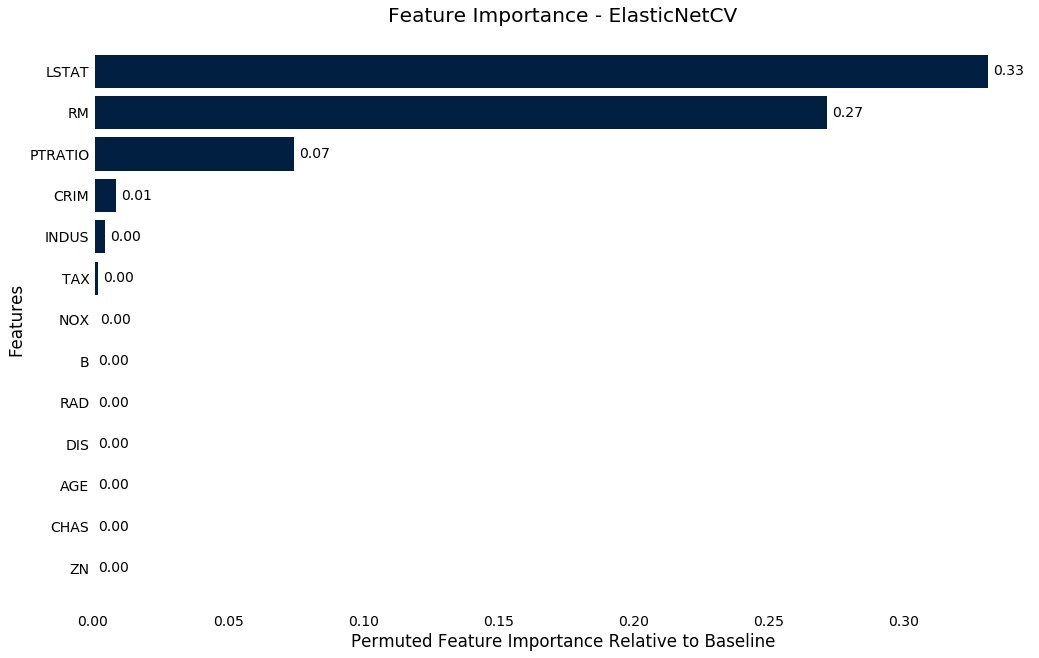

In [20]:
results.plot.feature_importance(1000)